In [2]:
# Import general libraries for data analysis
%matplotlib inline
import math as m
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Worldbank.xlsx', index_col=0)
df.head()

,CountryName,CountryCode,Agriculturalrawmaterialsexpor,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Exportsofgoodsandservices,Exportsofgoodsandservicesa,ExportsofgoodsandservicesB,Exportsofgoodsandservicesc,...,Fuelexportsofmerchandisee,Hightechnologyexportsofma,Hightechnologyexportscurrent,TaxesonexportscurrentLCU,Transportservicesofservice,Travelservicesofcommercial,Travelservicesofserviceex,high_income,income,development
Year,,,,,,,,,,,,,,,,,,,,,
2018,Andorra,AND,1.551347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013955,28.460560,3.391348e+07,NaN,NaN,NaN,NaN,1,high income,developed
2018,Antigua and Barbuda,ATG,0.000000,NaN,1.112068e+09,0.187833,NaN,NaN,1.151693e+09,NaN,...,0.000000,0.209768,3.911000e+03,NaN,12.063282,79.197620,79.085789,1,high income,developing
2018,Aruba,ABW,0.075850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.122011,8.338925,2.562959e+06,NaN,NaN,NaN,NaN,1,high income,developing
2018,Australia,AUS,2.293782,38000000.0,6.856142e+10,4.851458,21.804658,4.101769,3.272645e+11,3.350844e+11,...,24.448891,16.708318,5.274080e+09,NaN,8.130395,65.777866,64.968547,1,high income,developed
2018,Austria,AUT,1.613744,5000000.0,7.413284e+10,8.824110,55.755855,5.884652,2.538067e+11,2.640225e+11,...,2.047786,11.638526,1.668750e+10,NaN,23.070122,31.340080,31.080313,1,high income,developed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2018 to 2018
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CountryName                    217 non-null    object 
 1   CountryCode                    217 non-null    object 
 2   Agriculturalrawmaterialsexpor  126 non-null    float64
 3   ArmsexportsSIPRItrendindica    40 non-null     float64
 4   Commercialserviceexportscurr   164 non-null    float64
 5   Communicationscomputeretc      159 non-null    float64
 6   Exportsofgoodsandservices      168 non-null    float64
 7   Exportsofgoodsandservicesa     151 non-null    float64
 8   ExportsofgoodsandservicesB     163 non-null    float64
 9   Exportsofgoodsandservicesc     148 non-null    float64
 10  Foodexportsofmerchandisee      127 non-null    float64
 11  GoodsexportsBoPcurrentUS       164 non-null    float64
 12  Fuelexportsofmerchandisee      122 non-null   

# First task

In [ ]:
interval_and_ratio_vars = [
    'Agriculturalrawmaterialsexpor',
    'ArmsexportsSIPRItrendindica',
    'Commercialserviceexportscurr',
    'Communicationscomputeretc',
    'Exportsofgoodsandservices',
    'Exportsofgoodsandservicesa',
    'ExportsofgoodsandservicesB',
    'Exportsofgoodsandservicesc',
    'Foodexportsofmerchandisee',
    'GoodsexportsBoPcurrentUS',
    'Fuelexportsofmerchandisee',
    'Hightechnologyexportsofma',
    'Hightechnologyexportscurrent',
    'TaxesonexportscurrentLCU',
    'Transportservicesofservice',
    'Travelservicesofcommercial',
    'Travelservicesofserviceex'
]

def shapiroWilksTest(col_name):
    return stats.shapiro(df[col_name].dropna())

def kolmogorovSmirnovTest(col_name):
    return stats.kstest(df[col_name].dropna(), 'norm', args=(df[col_name].dropna().mean(), df[col_name].dropna().std()))

for i in interval_and_ratio_vars:
    print('---- NORMALITY TEST FOR VAR: ' + i + ' ----')
    
    # if count of non empty elements is less than 50, 
    #           we should use Kolmogorov-Smirnov Test
    # if count of non empty elements is more than 50,
    #           we should use Shapiro-Wilks Test
    result = None
    if df[i].count() < 50:
        result = shapiroWilksTest(i)
    else:
        result = kolmogorovSmirnovTest(i)

    print("pvalue = " + str(result[1]))
    print("statistics = " + str(result[0]))
    conc = ""
    if result[1] < 0.05:
        conc += "The distribution of Property Rights variable is different from the normal distribution => \n"
        conc += "the distribution is significantly different from normal"
    elif result[1] > 0.05:
        conc += "The distribution of Property Rights variable is not different from the normal distribution => \n"
        conc += "the distribution is not significantly different from normal"

    print("Conclustion: " + conc)
    print()

---- NORMALITY TEST FOR VAR: Agriculturalrawmaterialsexpor ----
pvalue = 3.924587324163506e-14
statistics = 0.347901815635626
Conclustion: The distribution of Property Rights variable is different from the normal distribution => 
the distribution is significantly different from normal

---- NORMALITY TEST FOR VAR: ArmsexportsSIPRItrendindica ----
pvalue = 9.669370339138172e-12
statistics = 0.38618260622024536
Conclustion: The distribution of Property Rights variable is different from the normal distribution => 
the distribution is significantly different from normal

---- NORMALITY TEST FOR VAR: Commercialserviceexportscurr ----
pvalue = 3.0805246924684517e-18
statistics = 0.34785581150990785
Conclustion: The distribution of Property Rights variable is different from the normal distribution => 
the distribution is significantly different from normal

---- NORMALITY TEST FOR VAR: Communicationscomputeretc ----
pvalue = 0.0007438419048175456
statistics = 0.1562162181400641
Conclustion: T

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

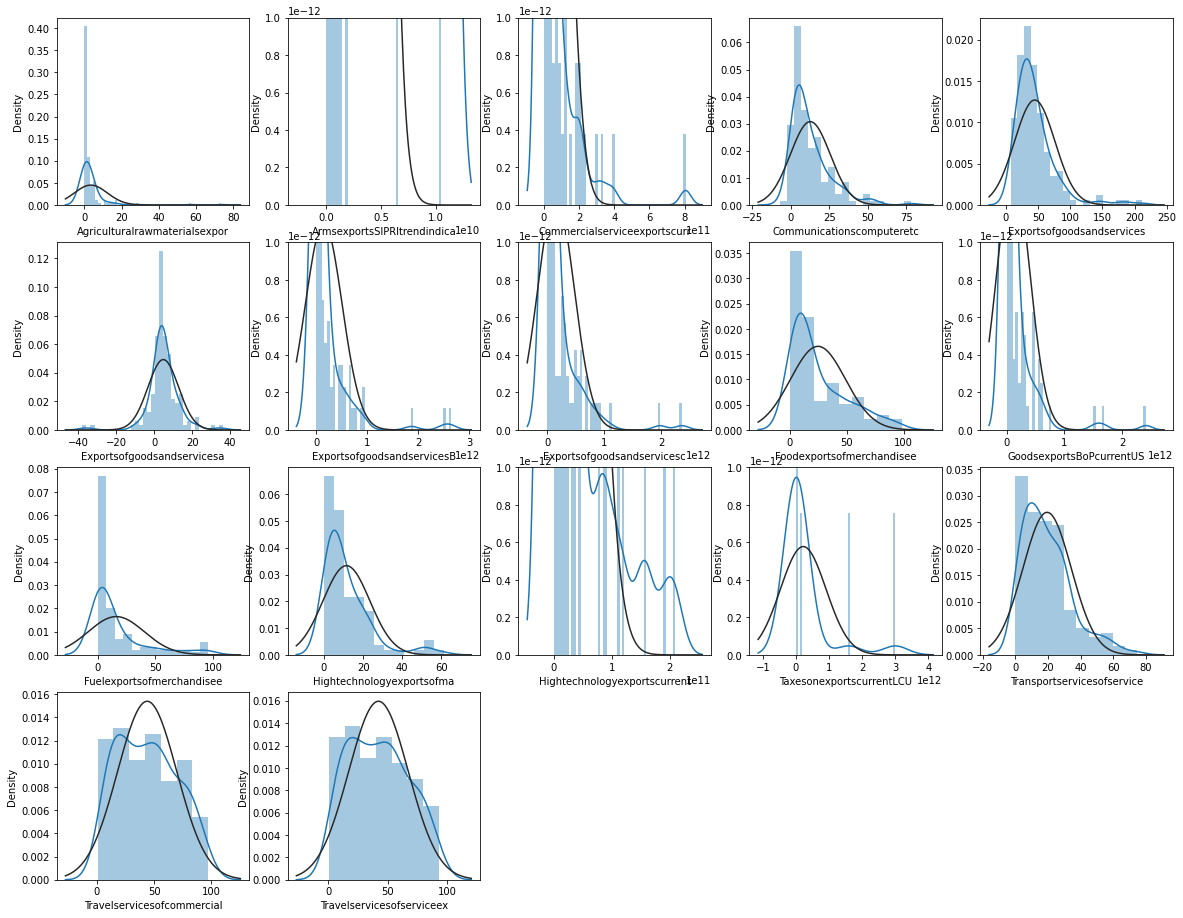

In [ ]:
import seaborn as sns
from scipy.stats import norm

f = plt.figure(figsize = (20, 20))
for i, j in zip(interval_and_ratio_vars, range(18)):
    f.add_subplot(5, 5, j+1)
    sns.distplot(df[i].dropna(), fit=norm).set(ylim=(0))
plt.show()

# Second task

In [9]:
# possible improve
# add interval and ratio scale variables for analyze

# Values (numeric) was got from the website (https://www.di-mgt.com.au/chisquare-calculator.html)
pairs_for_analyze = [
    ("development", "income", "Correlation between level of developing country and amount of income", 43.33026),
    ("development", "high_income", "Correlation between level of developing country and level of income", 37.0)
]

def chiSquareTest(col_name, col_name2):
    crosstab = pd.crosstab(df[col_name], df[col_name2])
    return 

for pair in pairs_for_analyze:
    print('---- Chi-Square of ' + pair[0] + ' and ' + pair[1] + ' ----')
    print('Why is it possible to make analysis? - ' + pair[2])
    crosstab = pd.crosstab(df[pair[0]], df[pair[1]])
    print(crosstab)
    print('-- TREND --')
    if pair[0] == 'development' and pair[1] == 'income':
        print('As the country becomes closer to developed, the income becomes higher')
    elif pair[0] == 'development' and pair[1] == 'high_income':
        print('As the country becomes closer to developed, the income becomes higher. That analysis help us to undertand how fast income becomes higher as developing.')
    print('-- END TREND --')
    result_test = stats.chi2_contingency(crosstab)
    print('chi2 = ' + str(result_test[0]))
    print('p-value = ' + str(result_test[1]))
    if result_test[0] > pair[3]:
        print('There is a realation between variables.')
    elif result_test[0] < pair[3]:
        print('There isn''t a realation between variables.')

    print()
    


---- Chi-Square of development and income ----
Why is it possible to make analysis? - Correlation between level of developing country and amount of income
income       high income  low income  middle income
development                                        
developed             46           0              1
developing            35          29            105
developing             1           0              0
-- TREND --
As the country becomes closer to developed, the income becomes higher
-- END TREND --
chi2 = 94.8008915223684
p-value = 1.256311477981638e-19
There is a realation between variables.

---- Chi-Square of development and high_income ----
Why is it possible to make analysis? - Correlation between level of developing country and level of income
high_income    0   1
development         
developed      1  46
developing   134  35
developing     0   1
-- TREND --
As the country becomes closer to developed, the income becomes higher. That analysis help us to undertand how fast

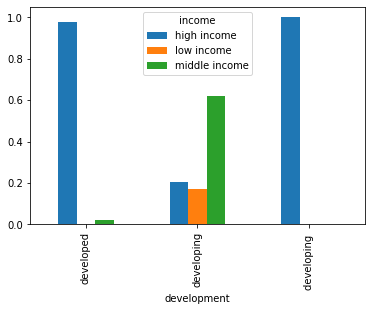

In [10]:
df.groupby(pairs_for_analyze[0][0])[pairs_for_analyze[0][1]].value_counts(normalize=True).unstack().plot(kind='bar')

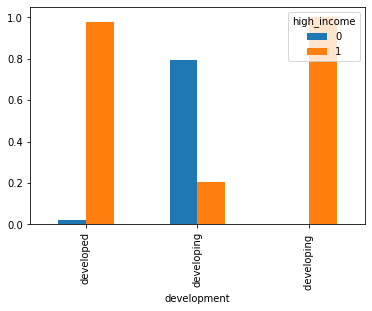

In [11]:
df.groupby(pairs_for_analyze[1][0])[pairs_for_analyze[1][1]].value_counts(normalize=True).unstack().plot(kind='bar')

# Third task

-0.0632480693124635
0.9918844373094652
0.784443046442328


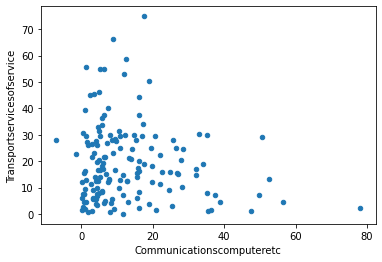

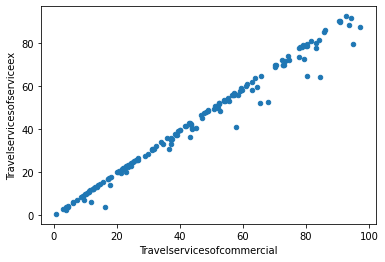

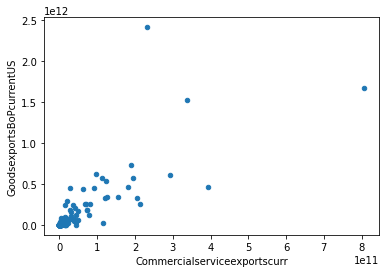

In [15]:
pairs = [('Communicationscomputeretc','Transportservicesofservice'), 
         ('Travelservicesofcommercial','Travelservicesofserviceex'), 
         ('Commercialserviceexportscurr', 'GoodsexportsBoPcurrentUS')]
for a,b in pairs:
  print(df[a].dropna().corr(df[b].dropna()))
  df.plot(a, b, kind='scatter')

1) ('**Communicationscomputeretc**','**Transportservicesofservice**')

In [19]:
stats.spearmanr(df['Communicationscomputeretc'].dropna(), df['Transportservicesofservice'].dropna())

SpearmanrResult(correlation=0.023820754716981134, pvalue=0.7656721648330531)

These two variables are scale variables, but their distributions are different from normal. Therefore, to evaluate the relationship between them we should calculate rank correlation coefficients (either Spearman or Kendall). As the values of each variable are mostly unique, and when we rank them we will receive nearly no tied ranks, the **Spearman correlation** is appropriate.

H1: There is a relationship between Communicationscomputeretc and Transportservicesofservice (r != 0)

H0: There is no relationship between Communicationscomputeretc and Transportservicesofservice (r = 0)

**Significance of relationship**: the relationship is **statistically insignificant** as p-value > 0.05, H0 is accepted.

2) (**Travelservicesofcommercial**, **Travelservicesofserviceex**)

In [20]:
stats.pearsonr(df['Travelservicesofcommercial'].dropna(), df['Travelservicesofserviceex'].dropna())

(0.9918844373094657, 2.4343549662314e-144)

These two variables are scale variables; their distributions are not different from normal. Therefore, to evaluate the relationship between them we can calculate **Pearson correlation coefficient**.

H1: There is a relationship between Travelservicesofcommercial and Travelservicesofserviceex (r != 0)

H0: There is no relationship between Travelservicesofcommercial and Travelservicesofserviceex (r = 0)

**Significance of relationship**: the relationship is **statistically significant** as p-value < 0.05, H1 is accepted.<br>
**Direction of relationship**: correlation coefficient is positive, therefore, there is a **direct relationship** between the variables.<br>
**Strength of the relationship**: the correlation coefficient is 0.99, therefore, there is a **very strong correlation** between the variables.

3) (**Commercialserviceexportscurr**, **GoodsexportsBoPcurrentUS**)

In [21]:
stats.spearmanr(df['Commercialserviceexportscurr'].dropna(), df['GoodsexportsBoPcurrentUS'].dropna())

SpearmanrResult(correlation=0.8650823663841769, pvalue=2.0925419216900298e-50)

These two variables are scale variables, but their distributions are different from normal. Therefore, to evaluate the relationship between them we should calculate rank correlation coefficients (either Spearman or Kendall). As the values of each variable are mostly unique, and when we rank them we will receive nearly no tied ranks, the **Spearman correlation** is appropriate.

H1: There is a relationship between Commercialserviceexportscurr and GoodsexportsBoPcurrentUS (r != 0)

H0: There is no relationship between Commercialserviceexportscurr and GoodsexportsBoPcurrentUS (r = 0)

**Significance of relationship**: the relationship is **statistically significant** as p-value < 0.05, H1 is accepted.<br>
**Direction of relationship**: correlation coefficient is positive, therefore, there is a **direct relationship** between the variables.<br>
**Strength of the relationship**: the correlation coefficient is 0.99, therefore, there is a **strong correlation** between the variables.

In [23]:
table_data = [
        ['(Communicationscomputeretc, Transportservicesofservice)', 'Spearman correlation', 'H0', '-', '-', '-'], 
        ['(Travelservicesofcommercial, Travelservicesofserviceex)','Pearson correlation', 'H1', 'very strong', 'direct', 'significant (p < 0.05)'],
        ['(Commercialserviceexportscurr, GoodsexportsBoPcurrentUS)', 'Spearman correlation', 'H1', 'strong', 'direct', 'significant (p < 0.05)']
        ]
pd.DataFrame(table_data, columns=['Variables','Appropriate correlation coefficient', 'Hypotheses', 'Strength of the relationship', 'Direction of the relationship', 'Significance of the relationship'])

,Variables,Appropriate correlation coefficient,Hypotheses,Strength of the relationship,Direction of the relationship,Significance of the relationship
0,"(Communicationscomputeretc, Transportserviceso...",Spearman correlation,H0,-,-,-
1,"(Travelservicesofcommercial, Travelservicesofs...",Pearson correlation,H1,very strong,direct,significant (p < 0.05)
2,"(Commercialserviceexportscurr, GoodsexportsBoP...",Spearman correlation,H1,strong,direct,significant (p < 0.05)


# Fourth task

Let's calculate a correlation between **Commercialserviceexportscurr** and **GoodsexportsBoPcurrentUS**.

In [4]:
import pingouin as pg
stats.spearmanr(df['Commercialserviceexportscurr'].dropna(), df['GoodsexportsBoPcurrentUS'].dropna())

SpearmanrResult(correlation=0.8650823663841769, pvalue=2.0925419216900298e-50)

Now let's control for the effect of **Exportsofgoodsandservices**

In [5]:
pg.partial_corr(data=df, x='Commercialserviceexportscurr', y='GoodsexportsBoPcurrentUS', covar='Exportsofgoodsandservices', method = 'spearman')

,n,r,CI95%,p-val
spearman,139,0.872348,"[0.83, 0.91]",4.215348e-44


We can conclude that the correlation between **Commercialserviceexportscurr** and **GoodsexportsBoPcurrentUS** did not change after controlling for **Exportsofgoodsandservices**.

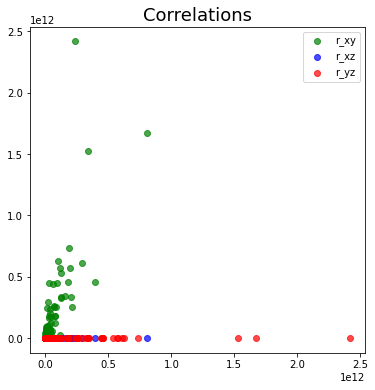

In [8]:
plt.figure(figsize=(6, 6))

plt.scatter(df['Commercialserviceexportscurr'].dropna(), df['GoodsexportsBoPcurrentUS'].dropna(), c='g', alpha=0.7, label='r_xy')
plt.scatter(df['Commercialserviceexportscurr'], df['Exportsofgoodsandservices'], c='b', alpha=0.7, label='r_xz')
plt.scatter(df['GoodsexportsBoPcurrentUS'], df['Exportsofgoodsandservices'], c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()